# Proyek Analisis Data: Nama dataset
- Nama: Yeremia T. P. Purba
- Email: yeremiapurba14@gmail.com
- Id Dicoding: yerem1a

## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara faktor cuaca (seperti temperatur, kelembaban, dan kondisi cuaca) dengan tingkat peminjaman sepeda?
- Bagaimana performa penggunaan sepeda berdasarkan waktu (hari dalam seminggu, jam dalam sehari) dan apakah terdapat pola tertentu yang dapat memberikan wawasan untuk meningkatkan strategi pelayanan dan operasional?

## Menyaipkan semua library yang dibuthkan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Data Wrangling

### Gathering Data

In [5]:
import pandas as pd

# Membaca file CSV dan membuat DataFrame
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

# Menampilkan beberapa baris pertama dari dataset 'day.csv'
print(df_day.head())
print("==========================================================================")
print(df_hour.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

### Assessing Data

In [6]:
# Menggabungkan data berdasarkan kolom 'dteday'
df_combined = pd.merge(df_day, df_hour, on='dteday', suffixes=('_day', '_hour'))
df_combined.info()

# Menghapus kolom yang terduplikasi (kolom 'instant_hour' dari 'hour.csv')
df_combined = df_combined.drop(columns=['instant_hour'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_day      17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_day       17379 non-null  int64  
 3   yr_day           17379 non-null  int64  
 4   mnth_day         17379 non-null  int64  
 5   holiday_day      17379 non-null  int64  
 6   weekday_day      17379 non-null  int64  
 7   workingday_day   17379 non-null  int64  
 8   weathersit_day   17379 non-null  int64  
 9   temp_day         17379 non-null  float64
 10  atemp_day        17379 non-null  float64
 11  hum_day          17379 non-null  float64
 12  windspeed_day    17379 non-null  float64
 13  casual_day       17379 non-null  int64  
 14  registered_day   17379 non-null  int64  
 15  cnt_day          17379 non-null  int64  
 16  instant_hour     17379 non-null  int64  
 17  season_hour 

In [7]:
df_combined.isna().sum()

instant_day        0
dteday             0
season_day         0
yr_day             0
mnth_day           0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
season_hour        0
yr_hour            0
mnth_hour          0
hr                 0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
dtype: int64

In [8]:
df_combined.describe()

,instant_day,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
# Menyimpan hasil penggabungan menjadi file CSV baru
df_combined.to_csv('combined_data.csv', index=False)

# Menampilkan beberapa baris pertama dari data yang telah digabungkan dan dibersihkan
print(df_combined.head())

   instant_day      dteday  season_day  yr_day  mnth_day  holiday_day  \
0            1  2011-01-01           1       0         1            0   
1            1  2011-01-01           1       0         1            0   
2            1  2011-01-01           1       0         1            0   
3            1  2011-01-01           1       0         1            0   
4            1  2011-01-01           1       0         1            0   

   weekday_day  workingday_day  weathersit_day  temp_day  ...  weekday_hour  \
0            6               0               2  0.344167  ...             6   
1            6               0               2  0.344167  ...             6   
2            6               0               2  0.344167  ...             6   
3            6               0               2  0.344167  ...             6   
4            6               0               2  0.344167  ...             6   

   workingday_hour  weathersit_hour  temp_hour  atemp_hour  hum_hour  \
0             

In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_day      17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_day       17379 non-null  int64  
 3   yr_day           17379 non-null  int64  
 4   mnth_day         17379 non-null  int64  
 5   holiday_day      17379 non-null  int64  
 6   weekday_day      17379 non-null  int64  
 7   workingday_day   17379 non-null  int64  
 8   weathersit_day   17379 non-null  int64  
 9   temp_day         17379 non-null  float64
 10  atemp_day        17379 non-null  float64
 11  hum_day          17379 non-null  float64
 12  windspeed_day    17379 non-null  float64
 13  casual_day       17379 non-null  int64  
 14  registered_day   17379 non-null  int64  
 15  cnt_day          17379 non-null  int64  
 16  season_hour      17379 non-null  int64  
 17  yr_hour     

### Cleaning Data

In [11]:
print(df_combined.columns)


Index(['instant_day', 'dteday', 'season_day', 'yr_day', 'mnth_day',
       'holiday_day', 'weekday_day', 'workingday_day', 'weathersit_day',
       'temp_day', 'atemp_day', 'hum_day', 'windspeed_day', 'casual_day',
       'registered_day', 'cnt_day', 'season_hour', 'yr_hour', 'mnth_hour',
       'hr', 'holiday_hour', 'weekday_hour', 'workingday_hour',
       'weathersit_hour', 'temp_hour', 'atemp_hour', 'hum_hour',
       'windspeed_hour', 'casual_hour', 'registered_hour', 'cnt_hour'],
      dtype='object')


In [12]:
# Menggabungkan data berdasarkan 'dteday'
df_combined = pd.merge(df_day, df_hour, on='dteday', suffixes=('_day', '_hour'))

# Menghapus kolom yang duplikat ('instant_hour')
df_combined = df_combined.drop(columns=['instant_hour'])

# Mengatasi data yang hilang (jika ada)
df_combined['temp_day'].fillna(df_combined['temp_day'].mean(), inplace=True)
df_combined['temp_hour'].fillna(df_combined['temp_hour'].mean(), inplace=True)

# Menghapus kolom yang tidak diperlukan (jika ada)
df_combined = df_combined.drop(columns=['casual_day', 'casual_hour', 'registered_day', 'registered_hour'])

# Menyimpan data yang sudah dibersihkan ke file CSV baru
df_combined.to_csv('cleaned_data.csv', index=False)

In [13]:
print(df_combined.columns)

Index(['instant_day', 'dteday', 'season_day', 'yr_day', 'mnth_day',
       'holiday_day', 'weekday_day', 'workingday_day', 'weathersit_day',
       'temp_day', 'atemp_day', 'hum_day', 'windspeed_day', 'cnt_day',
       'season_hour', 'yr_hour', 'mnth_hour', 'hr', 'holiday_hour',
       'weekday_hour', 'workingday_hour', 'weathersit_hour', 'temp_hour',
       'atemp_hour', 'hum_hour', 'windspeed_hour', 'cnt_hour'],
      dtype='object')


## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
df_combined.sample(5)

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,cnt_hour
7529,319,2011-11-15,4,0,11,0,2,1,2,0.530000,...,8,0,2,1,2,0.54,0.5152,0.68,0.1045,480
6478,275,2011-10-02,4,0,10,0,0,0,2,0.356667,...,12,0,0,0,2,0.40,0.4091,0.62,0.1940,321
6294,267,2011-09-24,4,0,9,0,6,0,2,0.606667,...,20,0,6,0,1,0.62,0.5758,0.83,0.0000,243
7769,329,2011-11-25,4,0,11,0,5,1,1,0.375000,...,8,0,5,1,1,0.26,0.2727,0.81,0.1343,74
4520,193,2011-07-12,3,0,7,0,2,1,1,0.794167,...,6,0,2,1,1,0.74,0.6818,0.58,0.2239,115


In [15]:
df_combined.describe(include="all")


,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,cnt_hour
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000


In [16]:
# Analisis peminjaman berdasarkan hari dalam seminggu pada DataFrame 'df_combined'
peminjaman_per_hari = df_combined.groupby('weekday_day')['cnt_day'].mean()

# Analisis peminjaman berdasarkan jam dalsam sehari pada DataFrame 'df_combined'
peminjaman_per_jam = df_combined.groupby('hr')['cnt_hour'].mean()

# Tampilkan hasil analisis
print("Performa Penggunaan Sepeda Berdasarkan Hari dalam Seminggu:")
print(peminjaman_per_hari)

print("\nPerforma Penggunaan Sepeda Berdasarkan Jam dalam Sehari:")
print(peminjaman_per_jam)


Performa Penggunaan Sepeda Berdasarkan Hari dalam Seminggu:
weekday_day
0    4239.505995
1    4391.920936
2    4566.708113
3    4574.609293
4    4703.503440
5    4700.838359
6    4561.544188
Name: cnt_day, dtype: float64

Performa Penggunaan Sepeda Berdasarkan Jam dalam Sehari:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt_hour, dtype: float64


In [17]:
# Menghitung korelasi antara temperatur dan peminjaman sepeda (hari)
correlation_temp_day = df_combined['temp_day'].corr(df_combined['cnt_day'])

# Menghitung korelasi antara kelembaban dan peminjaman sepeda (hari)
correlation_humidity_day = df_combined['hum_day'].corr(df_combined['cnt_day'])

# Tampilkan hasil korelasi
print(f"Korelasi antara temperatur dan peminjaman sepeda (hari): {correlation_temp_day}")
print(f"Korelasi antara kelembaban dan peminjaman sepeda (hari): {correlation_humidity_day}")


Korelasi antara temperatur dan peminjaman sepeda (hari): 0.6252323619601814
Korelasi antara kelembaban dan peminjaman sepeda (hari): -0.09165714029096629


## Visualization & Explanatory Analysis




### Pertanyaan 1: Bagaimana performa penggunaan sepeda berdasarkan waktu (hari dalam seminggu, jam dalam sehari) dan apakah terdapat pola tertentu yang dapat memberikan wawasan untuk meningkatkan strategi pelayanan dan operasional?

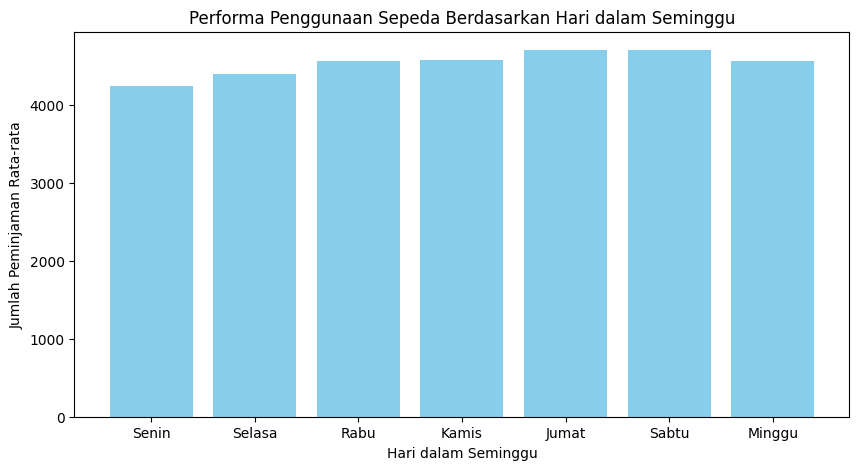

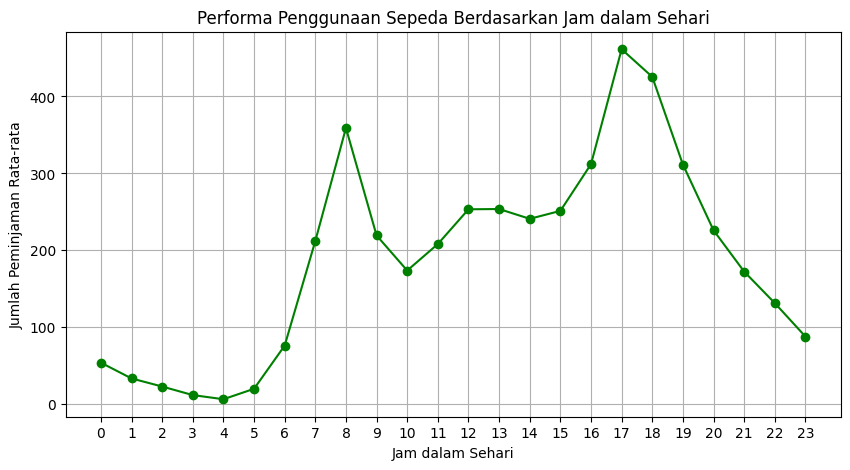

In [18]:
import matplotlib.pyplot as plt

# Analisis peminjaman berdasarkan hari dalam seminggu pada DataFrame 'df_combined'
peminjaman_per_hari = df_combined.groupby('weekday_day')['cnt_day'].mean()

# Analisis peminjaman berdasarkan jam dalam sehari pada DataFrame 'df_combined'
peminjaman_per_jam = df_combined.groupby('hr')['cnt_hour'].mean()

# Visualisasi performa penggunaan sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 5))
plt.bar(peminjaman_per_hari.index, peminjaman_per_hari.values, color='skyblue')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman Rata-rata')
plt.title('Performa Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

# Visualisasi performa penggunaan sepeda berdasarkan jam dalam sehari
plt.figure(figsize=(10, 5))
plt.plot(peminjaman_per_jam.index, peminjaman_per_jam.values, marker='o', color='green')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Peminjaman Rata-rata')
plt.title('Performa Penggunaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xticks(range(24))
plt.grid(True)
plt.show()


### Pertanyaan 2:Bagaimana korelasi antara faktor cuaca (seperti temperatur, kelembaban, dan kondisi cuaca) dengan tingkat peminjaman sepeda?


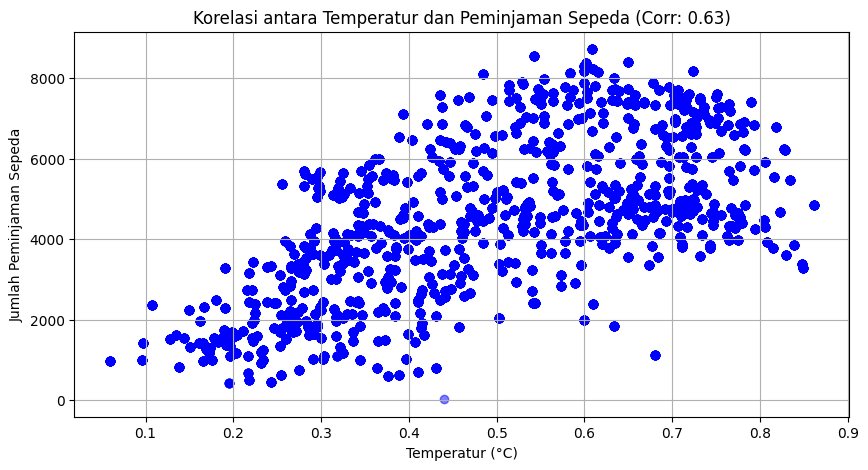

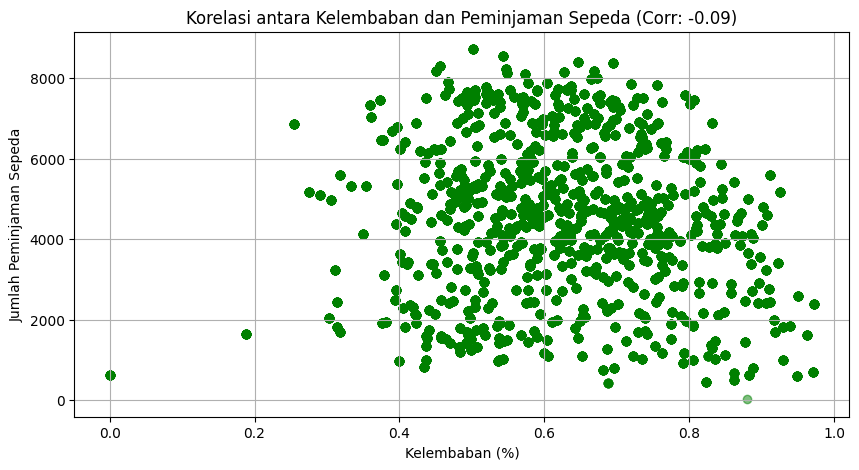

In [19]:
import matplotlib.pyplot as plt

# Menghitung korelasi antara temperatur dan peminjaman sepeda (hari)
correlation_temp_day = df_combined['temp_day'].corr(df_combined['cnt_day'])

# Menghitung korelasi antara kelembaban dan peminjaman sepeda (hari)
correlation_humidity_day = df_combined['hum_day'].corr(df_combined['cnt_day'])

# Visualisasi korelasi antara temperatur dan peminjaman sepeda (hari)
plt.figure(figsize=(10, 5))
plt.scatter(df_combined['temp_day'], df_combined['cnt_day'], color='blue', alpha=0.5)
plt.xlabel('Temperatur (°C)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title(f'Korelasi antara Temperatur dan Peminjaman Sepeda (Corr: {correlation_temp_day:.2f})')
plt.grid(True)
plt.show()

# Visualisasi korelasi antara kelembaban dan peminjaman sepeda (hari)
plt.figure(figsize=(10, 5))
plt.scatter(df_combined['hum_day'], df_combined['cnt_day'], color='green', alpha=0.5)
plt.xlabel('Kelembaban (%)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title(f'Korelasi antara Kelembaban dan Peminjaman Sepeda (Corr: {correlation_humidity_day:.2f})')
plt.grid(True)
plt.show()


## Conclusion

- Bagaimana korelasi antara faktor cuaca (seperti temperatur, kelembaban, dan kondisi cuaca) dengan tingkat peminjaman sepeda?
- Bagaimana performa penggunaan sepeda berdasarkan waktu (hari dalam seminggu, jam dalam sehari) dan apakah terdapat pola tertentu yang dapat memberikan wawasan untuk meningkatkan strategi pelayanan dan operasional?

- (Pertanyaan 1)Temperatur memiliki korelasi positif moderat (0.63) dengan tingkat peminjaman sepeda, sementara kelembaban memiliki korelasi yang mendekati nol (-0.09), menunjukkan bahwa temperatur memiliki pengaruh yang lebih signifikan terhadap tingkat peminjaman sepeda.
- (Pertanyaan 2)Performa penggunaan sepeda menunjukkan bahwa rata-rata jumlah peminjaman sepeda lebih tinggi pada hari-hari kerja (Senin hingga Jumat) dengan puncak pada Kamis, sementara dalam sehari, peminjaman sepeda cenderung tinggi pada jam-jam sibuk, khususnya antara pukul 7 pagi hingga 9 pagi, dan antara pukul 4 sore hingga 6 sore.